---

# The Blattle for Colombian Presidency through the management of social media
|Name|SNR|ANR|
|----|---|----|
|Andrea Gamboa Garcia|2075241|u770955|
|Jaime Gaona Sanchez|2075237|u971703|

## Research question

What are the strategies, in terms of words used and days of the week, that the most popular candidates for the Colombian presidency are using on Twitter?

## Motivation 

Colombian presidential elections will take place this year on May 29th, determining the country's economic and social policies for the next four years.

The current economic and political situation that the country is going through, have both national society and the international community in suspense, taking into account that in a country traditionally governed by the right wing, the most popular candidates come from the left and center left wing, Gustavo Petro and Sergio Fajardo respectively, which could impact the implementation of several macro and fiscal stability reforms that the country needs in the framework of the economic recovery of the COVID-19.

Currently four out of the six largest economies in Latin America have elected leftist presidents except for Brazil and Colombia, therefore, a victory in Colombia would mean an incalculable advance for the Latin American left. It is important to mention that Gustavo Petro, the candidate with the greatest intention to vote (42% according to the Colombia survey firm INVAMER), is a former M-19 guerrilla who was part of the demobilization process and has held important positions in politics as a congressman and mayor of the country's capital: Bogotá. On the other hand, Sergio Fajardo, the second candidate with the highest voting intention (18,9%), has been mayor of the second most populated city in Colombia, Medellin and was governor of its state.

The main purpose of this work is to carry out a text analysis through the computational tool Python about the public policy proposals that the candidates are mentioning as well as to identify their communication strategy via tweets and retweets. The codes used on the following assignment were based on a work published by the Colombian economist Santiago Matallana that is available in the following webpage: https://github.com/smatallana/presidential_speeches


## Method and Data

1. Download of the posts on Twitter: 

  

* To download the posts on Twitter (tweets and retweets) the Twitter Archiver plugin for Google Chrome was used. Taking into account that this tool does not allow us to download previously published tweets, the posts of the aforementioned candidates began to be downloaded from September 2021 in order to have as many data as possible. 

* Once the tweets and retweets were downloaded, the Twitter Archiver plugin allowed us to export the results to different types of files. For this project, the files were downloaded in an excel format. 

* In total, there were 2 files in xlxs format with the information of the tweets and retweets of each candidate. 

* Each file had information of the date (day, month and hour) of the post, the text of it, the device from which it was published (android, iphone), the number of followers each candidate has, the number of accounts they follow, how many retweets and favorites each post has, the location from which it was posted, and the bio of each candidate. 

  

2. Cleaning the text: 

  

* Once the xlxs files were downloaded, the files were imported. 

* The Pandas library was used to convert each file into a data frame and thus be able to export each file to a pickle file. 

* The format of date was separated in day, month and year in order to analyze the number of posts per day. Then it was calculated the day of the week of each post.  

* Tags, punctuation marks, special characters, capital letters, stopwords, etc. were removed from each file making use of the nltk and string libraries. 

* Tokens were created to separate the words of the sentences included in each post, with the aim of counting later the most common words used by the candidates. 

  

3. Text analysis 

  

* Once the most common words were identified, a dictionary of the most interesting words was created with the purpose of analyzing what are the public policy topics that the candidates are basing their campaigns. 

  

4. Econometrics 

  

* Using the cleaned database obtained in the second stage described above, a linear regression was run in order to identify the relationship between the day of the week the post was published and the number of retweets that the candidate obtained. 
* For that purpose, dummy variables were created for each day of the week and also for weekends.

# Preview of the answers

1. Gustavo Petro is much more active on Twitter than Sergio Fajardo.
2. In general terms, the day of the week has a small relationship with the number of retweets each post had. 
3. The speach of both candidates is focused on social affairs, critics of the actual government and the will to change the path of the country, as expected since both candidates are from the left and center-left wing parties.
4. Either Petro or Fajardo, aren't focusing their campaigns in relevant topics such as infraestructure, international trade, agriculuture and investment. 
5. While Petro has supported the strikes that happend in Colombia between the period of analysis, Fajardo hasnot gotten involved in this topic.

# Main assumptions

1. The tweets are made by human beings (no robots).
2. Text of tweets and retweets are considered as ideas of the candidate, even thought retweets were not elaborated direcly by them.
3. There is a relationship between the day of the week and the number of retweets of each post.
4. As the candidates have important differences in the number of followers and their activiy in Twitter, the relationship bewteen the day of the week and the retweets is divided by the mean of retweets in order to estimate the size effect.
5. 'Retweets' are considered a better indicator of the popularity of a candidate than 'favourites'.

# Python code for the first candidate: Gustavo Petro

In [1]:
## Importing libraries and packages 
import pandas as pd
import nltk
import numpy as np
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [18.0, 8.0]
plt.style.use("ggplot")
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
## Importing the excel file of Gustavo Petro
petro = pd.read_excel ('petro.xlsx')

In [3]:
## Deleting the hour of the posts to avoid confusions - Petro
petro['Date'] = pd.to_datetime(petro['Date']).dt.date

In [4]:
## Converting the column date into date format - Petro
petro['Date'] = pd.to_datetime(petro['Date'], errors="coerce")

In [5]:
## How the database looks like - Petro
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Google Maps
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN


In [6]:
## Number of posts from Gustavo Petro
len (petro)

17854

In [7]:
## Descriptive statistics for Petro
petro.describe()

,Tweet ID,Followers,Follows,Retweets,Favorites,Google Maps
count,1.785400e+04,1.785400e+04,17854.000000,17854.000000,17854.000000,0.0
mean,1.310013e+18,3.947670e+06,2436.664445,353.375490,197.224488,NaN
std,7.613169e+16,2.510326e+05,69.882380,945.123991,569.319994,NaN
min,1.200959e+18,3.567097e+06,2330.000000,0.000000,0.000000,NaN
25%,1.245097e+18,3.730269e+06,2373.000000,46.000000,0.000000,NaN
50%,1.296160e+18,3.942459e+06,2426.000000,105.000000,0.000000,NaN
75%,1.356213e+18,4.053841e+06,2482.000000,277.000000,216.000000,NaN
max,1.480241e+18,4.449204e+06,2596.000000,34505.000000,17339.000000,NaN


In [8]:
## Looking at some posts of Petro
petro['Tweet Text'].head()

0    RT @Der_Calo: En las últimas horas el reciente...
1    RT @ColombiaHumana_: Gustavo Petro salió en de...
2    RT @Heidy_UP: Avanza Asamblea Popular en la lo...
3    RT @HablaLaJradio: #ElParoNoPara30N | A esta h...
4    RT @BluRadioCo: "Pirómanos son los que se nieg...
Name: Tweet Text, dtype: object

In [9]:
## Separating the post's date into day, month and year - Petro
petro['Day'] = petro['Date'].dt.day
petro['Month'] = petro['Date'].dt.month
petro['Year'] = petro['Date'].dt.year
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Google Maps,Day,Month,Year
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,1,12,2019
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,1,12,2019
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,1,12,2019
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,1,12,2019
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,No,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,1,12,2019


In [10]:
## Analyzing the days when Petro posts 
### Number of posts per day
petro['Date'].value_counts()

2020-09-10    206
2020-09-11    127
2020-09-22    115
2020-11-27    109
2019-12-11    106
             ... 
2021-04-19      1
2021-01-01      1
2021-04-13      1
2021-01-02      1
2021-05-11      1
Name: Date, Length: 754, dtype: int64

In [11]:
### Getting the day of the week with datetime method - Petro
petro['Day'] = petro['Date'].dt.dayofweek

### Create dictionary to label categorical variable produced by 'dayofweek' method - Petro
days = {0:'Monday',1:'Tuesday',2:'Wedsnesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

### For each value in 'Weekday', apply function that labels with corresponding name of the weekday
petro['Day'] = petro['Day'].apply(lambda x: days[x])

In [12]:
### Creating categories for the days of the posts (order levels of factor variable) - Petro

petro['Day'] = \
    pd.Categorical(petro['Day'], ['Monday','Tuesday','Wedsnesday','Thursday','Friday','Saturday','Sunday'])

In [13]:
### Counting the number of posts by weekday - Petro

tweets_by_weekday_petro = petro['Day'].value_counts().sort_index()
tweets_by_weekday_petro


Monday        2580
Tuesday       2640
Wedsnesday    2532
Thursday      2535
Friday        2551
Saturday      2576
Sunday        2440
Name: Day, dtype: int64

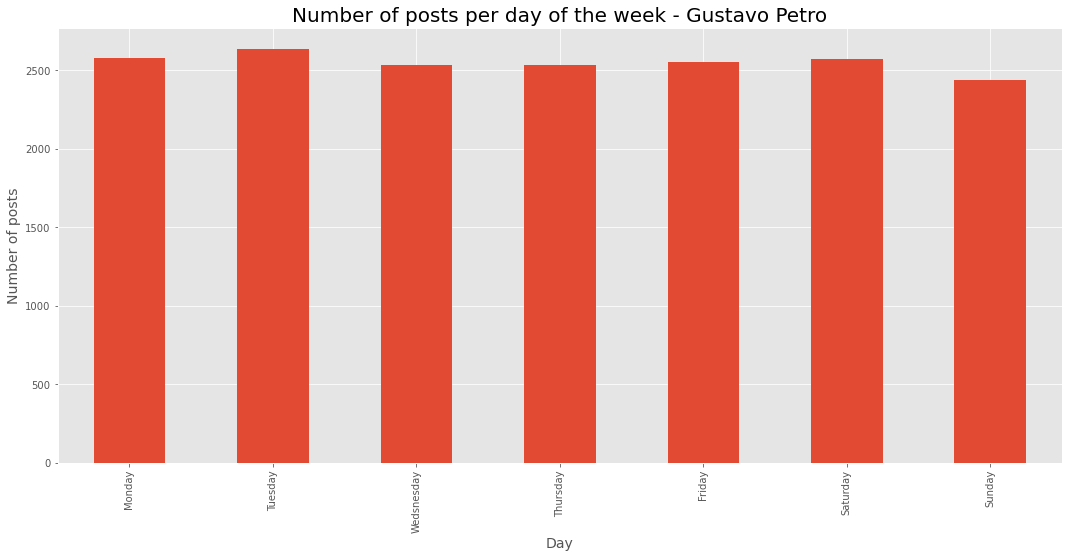

In [14]:
### Plot of the number of posts per day of the week - Petro

tweets_by_weekday_petro.plot.bar()
plt.title("Number of posts per day of the week - Gustavo Petro", fontdict={'fontsize': 20})
plt.ylabel("Number of posts", fontdict={'fontsize': 14})
plt.xlabel("Day", fontdict={'fontsize': 14});
plt.savefig('weekday_petro.png')

In [15]:
## Descriptive analysis - Petro
### Grouping by day
by_day_month_year = petro.groupby([petro['Date'].dt.year, petro['Date'].dt.month, petro['Date'].dt.day])

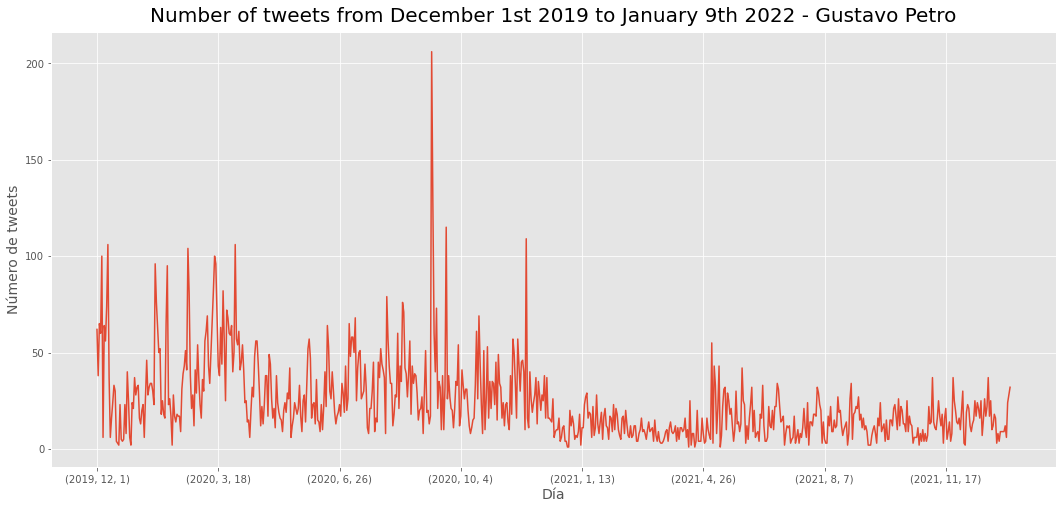

In [139]:
### Making a plot of the historical serie of posts by date - Petro

by_day = by_day_month_year['Day'].agg('count')
by_day.plot()
plt.title("Number of tweets from December 1st 2019 to January 9th 2022 - Gustavo Petro", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de tweets", fontdict={'fontsize': 14})
plt.xlabel("Día", fontdict={'fontsize': 14})
plt.savefig('tweets_days_petro.png')

In [121]:
## For the regression analysis - Petro
### Defining dummies for the day of week and creating columns with that information
petro["Dummy_Mon"] = np.where(petro["Day"].str.contains('Monday'), 1, 0)
petro["Dummy_Tue"] = np.where(petro["Day"].str.contains('Tuesday'), 1, 0)
petro["Dummy_Wed"] = np.where(petro["Day"].str.contains('Wednesday'), 1, 0)
petro["Dummy_Thu"] = np.where(petro["Day"].str.contains('Thursday'), 1, 0)
petro["Dummy_Fri"] = np.where(petro["Day"].str.contains('Friday'), 1, 0)
petro["Dummy_Sat"] = np.where(petro["Day"].str.contains('Saturday'), 1, 0)
petro["Dummy_Sun"] = np.where(petro["Day"].str.contains('Sunday'), 1, 0)
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,dios,virus,metro,Dummy_Mon,Dummy_Tue,Dummy_Wed,Dummy_Thu,Dummy_Fri,Dummy_Sat,Dummy_Sun
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,...,0,0,0,0,0,0,0,0,0,1
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,...,0,0,0,0,0,0,0,0,0,1
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,...,0,0,0,0,0,0,0,0,0,1
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,...,0,0,0,0,0,0,0,0,0,1
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,...,0,0,0,0,0,0,0,0,0,1


In [122]:
### Defining the independent variable as dummies of the week and the depended as Retweets - Petro
y=petro['Retweets']
x=petro[['Dummy_Mon','Dummy_Tue','Dummy_Wed','Dummy_Thu','Dummy_Fri','Dummy_Sat','Dummy_Sun']]

In [123]:
### Package for regression - Petro
import statsmodels.api as sm

In [124]:
### Including the consant - Petro
x = sm.add_constant(x)

In [125]:
### Estimating the linear regression between days of the week and retweets - Petro
lm=sm.OLS(y,x).fit()
lm.params
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Retweets   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.455
Date:                Thu, 27 Jan 2022   Prob (F-statistic):             0.0225
Time:                        13:58:26   Log-Likelihood:            -1.4765e+05
No. Observations:               17854   AIC:                         2.953e+05
Df Residuals:                   17847   BIC:                         2.954e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        347.8456     18.778     18.524      0.0

In [126]:
### Calculating the mean of Retweets - Petro
from statistics import mean
print (mean(petro['Retweets']))

353.3754900862552


In [127]:
### Defining the dummies for the weekends and creating columns with that information - Petro
petro["Dummy_WE"] = np.where(petro["Day"].str.contains('Sunday'or'Saturday'), 1, 0)
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,virus,metro,Dummy_Mon,Dummy_Tue,Dummy_Wed,Dummy_Thu,Dummy_Fri,Dummy_Sat,Dummy_Sun,Dummy_WE
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,...,0,0,0,0,0,0,0,0,1,1
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,...,0,0,0,0,0,0,0,0,1,1
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,...,0,0,0,0,0,0,0,0,1,1
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,...,0,0,0,0,0,0,0,0,1,1
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,...,0,0,0,0,0,0,0,0,1,1


In [128]:
### Estimating the linear regression between weekends and retweets - Petro
lm1=sm.OLS.from_formula('Retweets~Dummy_WE',petro).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               Retweets   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.495
Date:                Thu, 27 Jan 2022   Prob (F-statistic):             0.0340
Time:                        14:00:05   Log-Likelihood:            -1.4765e+05
No. Observations:               17854   AIC:                         2.953e+05
Df Residuals:                   17852   BIC:                         2.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    359.3412      7.612     47.208      0.0

In [20]:
## Cleaning the text - Petro
def remove_tags(text):
    return re.sub('<[^>]+>|\]|\[|\\u200b|\\n|\xa0', '', text)

In [21]:
### Removing tags - Petro
petro['Tweet'] = petro['Tweet Text'].apply(remove_tags)

In [22]:
### Looking at the dabase without tags - Petro
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,User Since,Location,Bio,Profile Image,Google Maps,Day,Month,Year,Day_Week,Tweet
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,...,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @Der_Calo: En las últimas horas el reciente...
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,...,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @ColombiaHumana_: Gustavo Petro salió en de...
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,...,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @Heidy_UP: Avanza Asamblea Popular en la lo...
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,...,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,...,2009-06-23 07:34:11,"ÜT: 4.650541,-74.074043",Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,"RT @BluRadioCo: ""Pirómanos son los que se nieg..."


In [23]:
### Having a look at punctuation - PEtro
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
### Adding extra punctuation that may contain the posts -taking into account that they were written in spanish - Petro
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [25]:
### Defining a function that eliminates the punctuation from the posts - Petro
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [26]:
### Adding a column with the post text without punctuation - Petro
petro['no_punct'] = petro['Tweet'].apply(no_punct)

In [27]:
### Eliminating capitals from the posts - Petro
petro['no_punct'] = petro['no_punct'].apply(str.lower)

In [28]:
### Having a look at the posts without punctuation - Petro
petro.no_punct[0]

'rt dercalo en las últimas horas el reciente campeón sudamericano de natación jorge iván agudelo denunció que fue expulsado del complej…'

In [29]:
### Downloading an additional package needed to tokenize text - Petro
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [30]:
### Using the token function to separate words - Petro
petro['tokens'] = petro['no_punct'].apply(word_tokenize)
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,Bio,Profile Image,Google Maps,Day,Month,Year,Day_Week,Tweet,no_punct,tokens
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,...,Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @Der_Calo: En las últimas horas el reciente...,rt dercalo en las últimas horas el reciente ca...,"[rt, dercalo, en, las, últimas, horas, el, rec..."
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,...,Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @ColombiaHumana_: Gustavo Petro salió en de...,rt colombiahumana gustavo petro salió en defen...,"[rt, colombiahumana, gustavo, petro, salió, en..."
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,...,Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,rt heidyup avanza asamblea popular en la local...,"[rt, heidyup, avanza, asamblea, popular, en, l..."
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,...,Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,rt hablalajradio elparonopara30n a esta hora ...,"[rt, hablalajradio, elparonopara30n, a, esta, ..."
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,...,Perfil Oficial del dirigente político progresi...,View,NaN,Sunday,12,2019,1.0,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",rt bluradioco pirómanos son los que se niegan ...,"[rt, bluradioco, pirómanos, son, los, que, se,..."


In [31]:
### Downloading an additional package for stopwords - Petro
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
### Defining a variable with stopwords in spanish - Petro
stopwords_esp = stopwords.words('spanish')

In [33]:
### Defining a function that eliminates stopwords - Petro
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [34]:
### Adding a column with the posts without stopwords - Petro
petro['no_stopwords'] = petro['tokens'].apply(no_stopwords)

In [35]:
### Adding a column with the posts without stopwords using the function nltk - Petro
petro['nltk_Text'] = petro['no_stopwords'].apply(nltk.Text)

In [36]:
### Having a look at the database with the changes - Petro
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,Google Maps,Day,Month,Year,Day_Week,Tweet,no_punct,tokens,no_stopwords,nltk_Text
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,...,NaN,Sunday,12,2019,1.0,RT @Der_Calo: En las últimas horas el reciente...,rt dercalo en las últimas horas el reciente ca...,"[rt, dercalo, en, las, últimas, horas, el, rec...","[rt, dercalo, últimas, horas, reciente, campeó...","(rt, dercalo, últimas, horas, reciente, campeó..."
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,...,NaN,Sunday,12,2019,1.0,RT @ColombiaHumana_: Gustavo Petro salió en de...,rt colombiahumana gustavo petro salió en defen...,"[rt, colombiahumana, gustavo, petro, salió, en...","[rt, colombiahumana, gustavo, petro, salió, de...","(rt, colombiahumana, gustavo, petro, salió, de..."
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,...,NaN,Sunday,12,2019,1.0,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,rt heidyup avanza asamblea popular en la local...,"[rt, heidyup, avanza, asamblea, popular, en, l...","[rt, heidyup, avanza, asamblea, popular, local...","(rt, heidyup, avanza, asamblea, popular, local..."
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,...,NaN,Sunday,12,2019,1.0,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,rt hablalajradio elparonopara30n a esta hora ...,"[rt, hablalajradio, elparonopara30n, a, esta, ...","[rt, hablalajradio, elparonopara30n, hora, des...","(rt, hablalajradio, elparonopara30n, hora, des..."
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,...,NaN,Sunday,12,2019,1.0,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",rt bluradioco pirómanos son los que se niegan ...,"[rt, bluradioco, pirómanos, son, los, que, se,...","[rt, bluradioco, pirómanos, niegan, negociar, ...","(rt, bluradioco, pirómanos, niegan, negociar, ..."


In [37]:
### Converting the file into a pickle file - Petro
petro.to_pickle('petro.pkl')

In [38]:
### Creating a dataframe with the pickle file and having a look at it - Petro
petro = pd.read_pickle('petro.pkl')
petro.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,Google Maps,Day,Month,Year,Day_Week,Tweet,no_punct,tokens,no_stopwords,nltk_Text
0,2019-12-01,@petrogustavo,Gustavo Petro,RT @Der_Calo: En las últimas horas el reciente...,1200959202778320896,Twitter for Android,3567097,2330,250,0,...,NaN,Sunday,12,2019,1.0,RT @Der_Calo: En las últimas horas el reciente...,rt dercalo en las últimas horas el reciente ca...,"[rt, dercalo, en, las, últimas, horas, el, rec...","[rt, dercalo, últimas, horas, reciente, campeó...","(rt, dercalo, últimas, horas, reciente, campeó..."
1,2019-12-01,@petrogustavo,Gustavo Petro,RT @ColombiaHumana_: Gustavo Petro salió en de...,1200959355320967168,Twitter for Android,3567097,2330,89,0,...,NaN,Sunday,12,2019,1.0,RT @ColombiaHumana_: Gustavo Petro salió en de...,rt colombiahumana gustavo petro salió en defen...,"[rt, colombiahumana, gustavo, petro, salió, en...","[rt, colombiahumana, gustavo, petro, salió, de...","(rt, colombiahumana, gustavo, petro, salió, de..."
2,2019-12-01,@petrogustavo,Gustavo Petro,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,1200960536831283200,Twitter for Android,3567097,2330,42,0,...,NaN,Sunday,12,2019,1.0,RT @Heidy_UP: Avanza Asamblea Popular en la lo...,rt heidyup avanza asamblea popular en la local...,"[rt, heidyup, avanza, asamblea, popular, en, l...","[rt, heidyup, avanza, asamblea, popular, local...","(rt, heidyup, avanza, asamblea, popular, local..."
3,2019-12-01,@petrogustavo,Gustavo Petro,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,1200960568200507395,Twitter for Android,3567097,2330,21,0,...,NaN,Sunday,12,2019,1.0,RT @HablaLaJradio: #ElParoNoPara30N | A esta h...,rt hablalajradio elparonopara30n a esta hora ...,"[rt, hablalajradio, elparonopara30n, a, esta, ...","[rt, hablalajradio, elparonopara30n, hora, des...","(rt, hablalajradio, elparonopara30n, hora, des..."
4,2019-12-01,@petrogustavo,Gustavo Petro,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",1200962676861652992,Twitter for Android,3567126,2330,151,0,...,NaN,Sunday,12,2019,1.0,"RT @BluRadioCo: ""Pirómanos son los que se nieg...",rt bluradioco pirómanos son los que se niegan ...,"[rt, bluradioco, pirómanos, son, los, que, se,...","[rt, bluradioco, pirómanos, niegan, negociar, ...","(rt, bluradioco, pirómanos, niegan, negociar, ..."


In [39]:
### Concatenating - Petro
all_tweets_petro = petro.Tweet.str.cat(sep=',')

In [40]:
### Adding extra characteres - Petro
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [41]:
### Strip punctuation from string: defining the function - Petro
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [42]:
### Strip punctuation from string - Petro
all_tweets_petro = no_punct(all_tweets_petro)

In [43]:
### Everything in lower case - Petro
all_tweets_petro = all_tweets_petro.lower()

In [44]:
### Having a look at the len of the posts - Petro
len(all_tweets_petro)

2250811

In [45]:
### Tokenize text - Petro
all_tokens_petro = word_tokenize(all_tweets_petro)

In [46]:
### Eliminating stopwords in spanish from the tokens: function - Petro
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [47]:
### Eliminating stopwords in spanish from the tokens - Petro
stopwords_esp = stopwords.words('spanish')

In [48]:
### Creating a variable of all tokens without stopwords - Petro
all_tokens_petro = no_stopwords(all_tokens_petro)

In [49]:
### Having a look at the len of all tokens - Petro
len(all_tokens_petro)

195007

In [50]:
### Frecuency of the tokens: top 80 most used - Petro
nltk.FreqDist(all_tokens_petro).most_common(80)

[('petrogustavo', 3015),
 ('colombia', 1716),
 ('bogotá', 1138),
 ('hoy', 977),
 ('si', 909),
 ('duque', 794),
 ('gobierno', 735),
 ('solo', 556),
 ('humana', 545),
 ('debe', 505),
 ('país', 494),
 ('petro', 492),
 ('salud', 475),
 ('ser', 451),
 ('política', 430),
 ('san', 395),
 ('juan', 373),
 ('uribe', 369),
 ('social', 364),
 ('hace', 355),
 ('parte', 353),
 ('puede', 353),
 ('hacer', 352),
 ('pacto', 346),
 ('toda', 324),
 ('cambio', 318),
 ('claudialopez', 314),
 ('vida', 308),
 ('pueblo', 303),
 ('claudia', 294),
 ('nacional', 292),
 ('presidente', 292),
 ('debate', 292),
 ('policía', 289),
 ('paz', 286),
 ('mundo', 279),
 ('personas', 272),
 ('millones', 269),
 ('gente', 268),
 ('dice', 265),
 ('años', 263),
 ('aquí', 260),
 ('dios', 254),
 ('virus', 248),
 ('así', 247),
 ('gran', 246),
 ('gustavobolivar', 245),
 ('de…', 241),
 ('gustavo', 240),
 ('ahora', 234),
 ('metro', 234),
 ('ciudad', 224),
 ('histórico', 224),
 ('dos', 220),
 ('senador', 220),
 ('jóvenes', 218),
 ('ley'

In [51]:
### Import Counter to count the words - Petro
from collections import Counter

In [52]:
### Defining a function that counts each words - Petro
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [53]:
### Adding columns with the most used political words used by Petro
petro['duque'] = [col_counter(petro['no_stopwords'][i], 'duque') for i in range(len(petro['no_stopwords']))]
petro['humana'] = [col_counter(petro['no_stopwords'][i], 'humana') for i in range(len(petro['no_stopwords']))]
petro['salud'] = [col_counter(petro['no_stopwords'][i], 'salud') for i in range(len(petro['no_stopwords']))]
petro['uribe'] = [col_counter(petro['no_stopwords'][i], 'uribe') for i in range(len(petro['no_stopwords']))]
petro['social'] = [col_counter(petro['no_stopwords'][i], 'social') for i in range(len(petro['no_stopwords']))]
petro['pacto'] = [col_counter(petro['no_stopwords'][i], 'pacto') for i in range(len(petro['no_stopwords']))]
petro['claudialopez'] = [col_counter(petro['no_stopwords'][i], 'claudialopez') for i in range(len(petro['no_stopwords']))]
petro['cambio'] = [col_counter(petro['no_stopwords'][i], 'cambio') for i in range(len(petro['no_stopwords']))]
petro['vida'] = [col_counter(petro['no_stopwords'][i], 'vida') for i in range(len(petro['no_stopwords']))]
petro['pueblo'] = [col_counter(petro['no_stopwords'][i], 'pueblo') for i in range(len(petro['no_stopwords']))]
petro['policía'] = [col_counter(petro['no_stopwords'][i], 'policía') for i in range(len(petro['no_stopwords']))]
petro['paz'] = [col_counter(petro['no_stopwords'][i], 'paz') for i in range(len(petro['no_stopwords']))]
petro['dios'] = [col_counter(petro['no_stopwords'][i], 'dios') for i in range(len(petro['no_stopwords']))]
petro['virus'] = [col_counter(petro['no_stopwords'][i], 'virus') for i in range(len(petro['no_stopwords']))]
petro['metro'] = [col_counter(petro['no_stopwords'][i], 'metro') for i in range(len(petro['no_stopwords']))]


In [54]:
### Total of mentions by each interest word - Petro
totals_by_topic_petro= petro.iloc[:,24:].sum().sort_values(ascending=False)
totals_by_topic_petro = totals_by_topic_petro
totals_by_topic_petro

duque           866
humana          547
salud           475
uribe           390
social          367
pacto           346
cambio          321
claudialopez    314
vida            309
pueblo          304
policía         293
paz             291
dios            256
virus           250
metro           235
dtype: int64

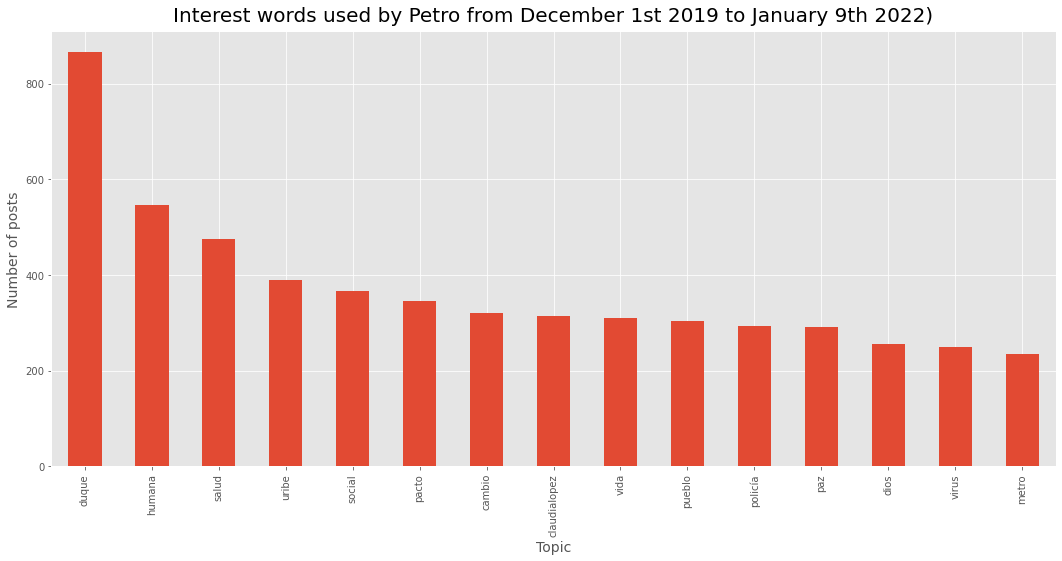

In [55]:
### Ploting the number of interest words used by Petro

totals_by_topic_petro.plot(kind='bar')

plt.title("Interest words used by Petro from December 1st 2019 to January 9th 2022)", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of posts", fontdict={'fontsize': 14})
plt.xlabel("Topic", fontdict={'fontsize': 14})
plt.savefig('topics_total_petro.png')

In [56]:
### Defining words of interest in spanish - Petro
of_interest_petro = ['paz','seguridad','educación','pobreza','desarrollo','empleo',\
                             'trabajo','recursos','progreso','social','niños', 'prosperidad',\
                             'víctimas','policía','conflicto','posconflicto''verdad''justicia',\
                             'reparación','restitución', 'garantías', 'garantía', 'repetición',\
                             'género', 'tierra', 'tierras', 'rural','reforma','zonas','integral', 'indígenas', 'campensina',\
                             'campesinos','pensión', 'pensional', 'salud', 'infancia',\
                             'adolescencia','paz', 'jurisdicción','jep', 'jueces', 'justicia', 'farc','guerrila', 'acuerdo', 'cultivos', 'ilícitos',\
                             'narcotráfico', 'inclusión','reconciliación','transporte',\
                             'vías','grupos','étnicos','empresa', 'empresarios', 'empresariado',\
                             'privado', 'regiones','transformación', 'estructural','alimentos',\
                             'nutrición', 'niñas','adulto', 'adultos', 'mayor', 'mayores',\
                             'ingresos','sostenibilidad', 'ambiental', 'medio',\
                             'ambiente', 'reserva', 'cooperativas', 'miseria',\
                             'extrema', 'campo','vulnerabilidad', 'bienestar', 'paramilitares',\
                             'paramilitar','banrep','ingreso','solidario', 'marcha', 'marchas','protesta','protestas','sos','matando','líderes'\
                             'integralidad','innovación','ciencia', 'tecnología', 'asistencia','naranja',\
                             'técnica','infraestructura', 'conectividad', 'propiedad','participación',\
                             'eln', 'ied' 'vías', 'concertación', 'democracia', 'formalización',\
                             'agrícola', 'fondo','tierras', 'reserva', 'forestal', 'catastral',\
                             'subsidios', 'subsidio', 'créditos', 'crédito','capacitación',\
                             'comercialización', 'agraria', 'jurisdicción', 'economía',\
                             'impuestos','tributaria','comunidades', 'corrupción', 'inversión',\
                             'crisis','venezuela', 'mujer', 'mujeres', 'niñas','servicios',\
                             'energía','agua', 'conectividad', 'investigación', 'desarrollo',\
                             'eficiencia','ingresos','plan','programa','resultados', 'asociatividad',\
                             'lgtbi', 'comercio', 'agricultura', 'prosperidad','social', 'familia',\
                             'derechos', 'garantías','congreso', 'prevención', 'región', 'regiones',\
                             'evaluación','seguimiento','calidad', 'protesta', 'protestas','crecimiento',\
                             'guerra', 'ciudadana', 'ciudadanos', 'tolerancia', 'vivienda',\
                             'oportunidad', 'control', 'trabajo', 'obras', 'electoral', 'transparencia',\
                             'construir', 'municipios', 'municipios', 'cese', 'fuego', 'departamento',\
                             'departamentos', 'pueblo','compromiso','nuevo','nueva', 'información',\
                             'sometimiento', 'monitoreo', 'cambio', 'derecho','reincorporación', 'campaña',\
                             'representación', 'política', 'problema', 'realidad', 'acceso', 'pobres',\
                             'desempleo', 'extrema', 'responsabilidad', 'pedagogía', 'juntos',\
                             'inversiones', 'respeto', 'garantía','derechos', 'humanos', 'fiscal',\
                             'construcción', 'estado', 'acción', 'acciones', 'criminales', 'instituciones',\
                             'universidades', 'academia', 'confianza', 'plan', 'equidad','atención',\
                             'narcotráfico','militares','supervisión', 'inspección', 'minería',\
                             'regalías', 'sometimiento', 'drogas', 'ilícitas', 'colombia','jóvenes',\
                             'producción','económico','colegios','competitividad','energía','cifra',\
                             'cultura', 'tratados', 'progreso', 'campaña', 'constitución','público',\
                             'constitucional','empleos', 'empleo', 'constituyente', 'industria',\
                             'sena', 'lavado', 'activos', 'diálogos', 'humanos', 'convivencia',\
                             'legitimidad', 'leyes', 'reformas', 'ley', 'presupuesto', 'alianza',\
                             'dólar', 'petróleo', 'inflación', 'pib', 'deuda', 'ocde', 'oecd', 'políticas',\
                             'públicas', 'público', 'militar', 'militares', 'gremios', 'cafeteros',\
                             'café', 'agro', 'cafeteros', 'colectiva', 'discriminación', 'articulación',\
                             'institucional', 'interinstitucional', 'juntos', 'habana','dependencia','aguacate', 'reto',\
                             'privado', 'prioridad', 'turismo', 'cooperación', 'mesa', 'apoyo',\
                             'acompañamiento', 'internacional', 'redes', 'sociales', 'inversionistas',\
                             'desigualdad', 'bilateral', 'improductivas', 'terrorismo', 'bandas', 'bacrim','medios',\
                             'comunicación', 'estrategia', 'estrategias', 'judicial', 'homicidios',\
                             'inseguridad', 'presencia', 'cambio', 'climático', 'carreteras', 'apps',\
                             'responsables', 'población', 'civil', 'desplazamiento', 'desplazados',\
                             'desplazamientos','retornos', 'reubicaciones', 'delitos', 'lesa',\
                             'humanidad', 'petróleo', 'hechos', 'productividad', 'competitividad',\
                             'uribe', 'santos', 'petro','fajardo', 'claudia', 'lópez', 'martha','lucia','ramirez',\
                             'iván', 'duque', 'humberto', 'calle', 'partido', 'conservador', 'liberal', 'verde',\
                             'conflictos', 'resolución', 'amnistía', 'ricos', 'libertad','cuidadanía','libre','tlc', 'presidente', 'riqueza', 'ricos',\
                             'privación', 'defensa', 'gratis', 'gratuita', 'extorsión', 'secuestro',\
                             'desmovilización', 'desmovolizados', 'comandantes', 'fuerzas', 'armadas',\
                             'guerrilleros', 'brechas', 'brecha',\
                             'internet', 'acceso', 'enemigos', 'perdón', 'salarios', 'minas','deporte',\
                             'recreación', 'elecciones', 'campaña', 'déficit', 'delincuentes',\
                             'delincuencia', 'cárcel', 'acueducto', 'tratados', 'coca', 'marihuana',\
                             'igualdad', 'impunidad', 'muertos', 'muerte', 'maestros',\
                             'cabecillas', 'consumidor', 'consumidores', 'recursos', 'naturales',\
                             'renovables', 'castigo', 'covid', 'pandemia', 'marchas', 'protesta','vacunas', 'vacunación','renta','vital','mínimo']       

In [57]:
### Len of words of interest - Petro
len(of_interest_petro)

411

In [58]:
### Filtering from all tokens the words of interest - Petro
tokens_of_interest_petro = [w for w in all_tokens_petro if w in of_interest_petro]

In [59]:
### Adding the frequency of the words in each list - Petro
freq_tokens_of_interes_petro = nltk.FreqDist(tokens_of_interest_petro).most_common()

In [60]:
### Having a look at it: how many times is the word of interest mentioned - Petro
freq_tokens_of_interes_petro

[('colombia', 1716),
 ('duque', 794),
 ('petro', 492),
 ('salud', 475),
 ('política', 430),
 ('uribe', 369),
 ('social', 364),
 ('cambio', 318),
 ('pueblo', 303),
 ('claudia', 294),
 ('presidente', 292),
 ('policía', 289),
 ('paz', 286),
 ('jóvenes', 218),
 ('ley', 214),
 ('campaña', 193),
 ('congreso', 191),
 ('pandemia', 190),
 ('justicia', 185),
 ('covid', 177),
 ('medio', 171),
 ('derechos', 170),
 ('acuerdo', 167),
 ('economía', 164),
 ('reforma', 156),
 ('partido', 154),
 ('población', 152),
 ('derecho', 147),
 ('realidad', 140),
 ('agua', 140),
 ('crisis', 138),
 ('muertos', 138),
 ('democracia', 138),
 ('nuevo', 136),
 ('defensa', 133),
 ('plan', 132),
 ('elecciones', 128),
 ('protesta', 123),
 ('fajardo', 123),
 ('muerte', 122),
 ('corrupción', 122),
 ('climático', 122),
 ('familia', 119),
 ('nueva', 118),
 ('mayor', 117),
 ('calle', 115),
 ('público', 115),
 ('verde', 114),
 ('constitución', 111),
 ('fiscal', 111),
 ('mujeres', 109),
 ('construir', 104),
 ('venezuela', 103),


# Python code for the second candidate: Sergio Fajardo

In [61]:
## Importing the excel file of Sergio Fajardo
fajardo = pd.read_excel ('fajardo.xlsx')

In [63]:
## Deleting the hour of the post to avoid confusions - Fajardo
fajardo['Date'] = pd.to_datetime(fajardo['Date']).dt.date


In [64]:
## Converting the column date into date format - Fajardo
fajardo['Date'] = pd.to_datetime(fajardo['Date'], errors="coerce")

In [65]:
## How the database looks like - Fajardo
fajardo.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Google Maps
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN


In [66]:
## Number of posts from Fajardo
len (fajardo)

4064

In [67]:
## Descriptive statistics - Fajardo
fajardo.describe()

,Tweet ID,Followers,Follows,Retweets,Favorites,Google Maps
count,4.064000e+03,4.064000e+03,4064.000000,4064.000000,4064.000000,0.0
mean,1.358911e+18,1.565190e+06,455.957185,161.029281,32.695374,NaN
std,8.593037e+16,3.498434e+04,98.121611,2702.330214,98.141563,NaN
min,1.201958e+18,1.471318e+06,350.000000,0.000000,0.000000,NaN
25%,1.276774e+18,1.543120e+06,370.000000,4.000000,0.000000,NaN
50%,1.380504e+18,1.569659e+06,411.000000,8.000000,1.000000,NaN
75%,1.441598e+18,1.595553e+06,559.000000,23.000000,31.000000,NaN
max,1.480354e+18,1.605324e+06,640.000000,151387.000000,3722.000000,NaN


In [68]:
## Looking some posts of Fajardo
fajardo['Tweet Text'].head()

0    RT @andresaguirrem: Este es un día especial pa...
1    RT @Uniandes: #ClaseALaCalle "Es preocupante l...
2    RT @LeopoldoTweets: El llamado al diálogo que ...
3    RT @ivanmarulanda: Esta fue mi intervención en...
4    RT @afajardoa: La primera vez me molestó porqu...
Name: Tweet Text, dtype: object

In [69]:
## Separating the post date into day, month and year - Fajardo
fajardo['Day'] = fajardo['Date'].dt.day
fajardo['Month'] = fajardo['Date'].dt.month
fajardo['Year'] = fajardo['Date'].dt.year
fajardo.head()


,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Google Maps,Day,Month,Year
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,4,12,2019
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,4,12,2019
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,4,12,2019
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,4,12,2019
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,4,12,2019


In [70]:
## Descriptive analysis - Fajardo
### Number of posts per day
fajardo['Date'].value_counts()

2021-11-30    78
2021-07-23    60
2021-10-24    55
2021-06-11    53
2021-12-13    53
              ..
2020-08-12     1
2022-01-05     1
2021-07-10     1
2020-12-03     1
2020-11-02     1
Name: Date, Length: 704, dtype: int64

In [71]:
### Getting the day of the week with datetime method - Fajardo
fajardo['Day'] = fajardo['Date'].dt.dayofweek

### Creating a dictionary to label categorical variables produced by 'dayofweek' method - Fajardo
days = {0:'Monday',1:'Tuesday',2:'Wedsnesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

### For each value in 'Weekday', apply function that labels with corresponding name of the weekday - Fajardo
fajardo['Day'] = fajardo['Day'].apply(lambda x: days[x])

In [72]:
### Order levels of factor variable - Fajardo

fajardo['Day'] = \
    pd.Categorical(fajardo['Day'], ['Monday','Tuesday','Wedsnesday','Thursday','Friday','Saturday','Sunday'])

In [73]:
### Getting the count by weekday - Fajardo

tweets_by_weekday_fajardo = fajardo['Day'].value_counts().sort_index()
tweets_by_weekday_fajardo

Monday        498
Tuesday       589
Wedsnesday    699
Thursday      690
Friday        736
Saturday      459
Sunday        393
Name: Day, dtype: int64

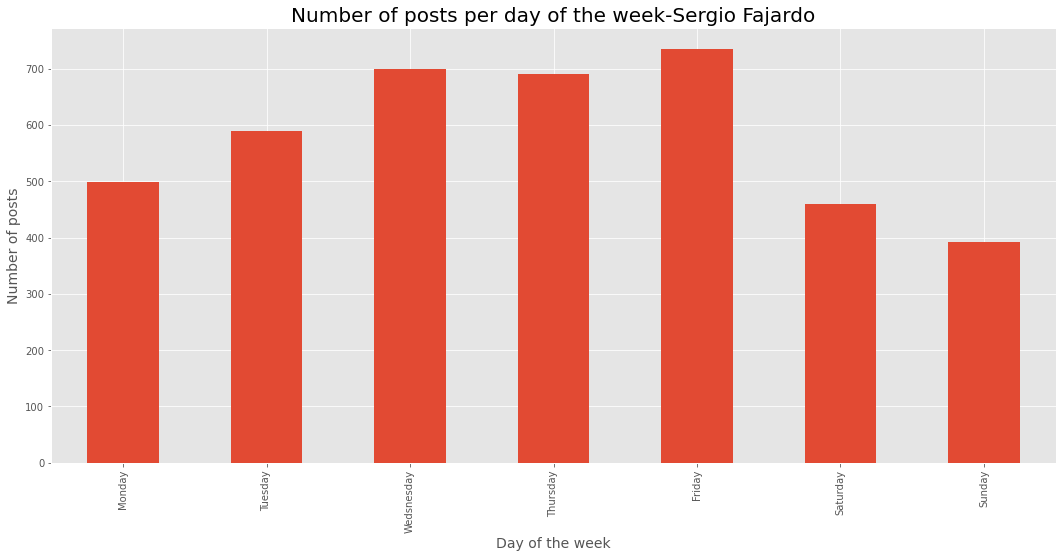

In [118]:
### Ploting the number of posts per day of the week - Fajardo

tweets_by_weekday_fajardo.plot.bar()
plt.title("Number of posts per day of the week-Sergio Fajardo", fontdict={'fontsize': 20})
plt.ylabel("Number of posts", fontdict={'fontsize': 14})
plt.xlabel("Day of the week", fontdict={'fontsize': 14});
plt.savefig('weekday_fajardo.png')

In [75]:
## Descriptive analysis - Fajardo
### Grouping by day
by_day_month_year_f = fajardo.groupby([fajardo['Date'].dt.year, fajardo['Date'].dt.month, fajardo['Date'].dt.day])

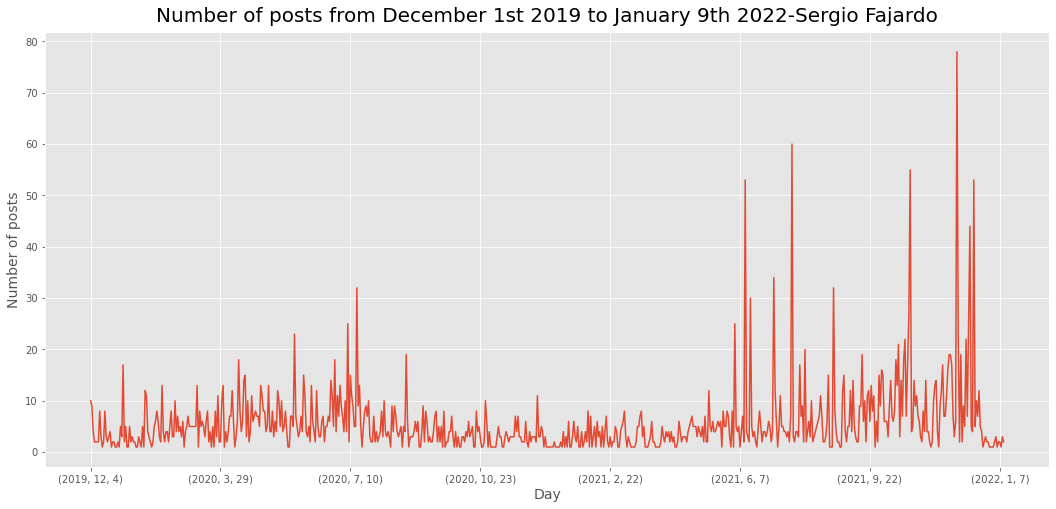

In [140]:
### Making a plot of the historical serie of posts by date - Fajardo

by_day = by_day_month_year_f['Day'].agg('count')
by_day.plot()
plt.title("Number of posts from December 1st 2019 to January 9th 2022-Sergio Fajardo", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number of posts", fontdict={'fontsize': 14})
plt.xlabel("Day", fontdict={'fontsize': 14})
plt.savefig('tweets_days_fajardo.png')

In [129]:
## For the regression - Fajardo
### Defining the dummies as the day of week and creating columns with that information
fajardo["Dummy_Mon"] = np.where(fajardo["Day"].str.contains('Monday'), 1, 0)
fajardo["Dummy_Tue"] = np.where(fajardo["Day"].str.contains('Tuesday'), 1, 0)
fajardo["Dummy_Wed"] = np.where(fajardo["Day"].str.contains('Wednesday'), 1, 0)
fajardo["Dummy_Thu"] = np.where(fajardo["Day"].str.contains('Thursday'), 1, 0)
fajardo["Dummy_Fri"] = np.where(fajardo["Day"].str.contains('Friday'), 1, 0)
fajardo["Dummy_Sat"] = np.where(fajardo["Day"].str.contains('Saturday'), 1, 0)
fajardo["Dummy_Sun"] = np.where(fajardo["Day"].str.contains('Sunday'), 1, 0)
fajardo.head() 

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,confianza,desarrollo,petro,Dummy_Mon,Dummy_Tue,Dummy_Wed,Dummy_Thu,Dummy_Fri,Dummy_Sat,Dummy_Sun
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
### Defining the independent variable as dummies of the week and the depended as Retweets - Fajardo
y2=fajardo['Retweets']
x2=fajardo[['Dummy_Mon','Dummy_Tue','Dummy_Thu','Dummy_Fri','Dummy_Sat','Dummy_Sun']]

In [131]:
### Package for regression - Fajardo
import statsmodels.api as sm

In [132]:
### Including the constant - Fajardo
x = sm.add_constant(x)

In [138]:
### Estimating the linear regression between day of the week and retweets - Fajardo
lm2=sm.OLS(y2,x2).fit()
lm2.params
print(lm2.summary())

                                 OLS Regression Results                                
Dep. Variable:               Retweets   R-squared (uncentered):                   0.002
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.334
Date:                Thu, 27 Jan 2022   Prob (F-statistic):                       0.238
Time:                        17:18:46   Log-Likelihood:                         -37882.
No. Observations:                4064   AIC:                                  7.578e+04
Df Residuals:                    4058   BIC:                                  7.581e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [134]:
### Calculating the mean of Retweets - Fajardo
from statistics import mean
print (mean(fajardo['Retweets']))

161.029281496063


In [135]:
### Defining the dummies for the weekends and creating columns with that information - Fajardo
fajardo["Dummy_WE"] = np.where(fajardo["Day"].str.contains('Sunday'or'Saturday'), 1, 0)
fajardo.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,desarrollo,petro,Dummy_Mon,Dummy_Tue,Dummy_Wed,Dummy_Thu,Dummy_Fri,Dummy_Sat,Dummy_Sun,Dummy_WE
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,...,0,0,0,0,0,0,0,0,0,0
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,...,0,0,0,0,0,0,0,0,0,0
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,...,0,0,0,0,0,0,0,0,0,0
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,...,0,0,0,0,0,0,0,0,0,0
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
### Estimating the linear regression between weekends and retweets - Fajardo
lm3=sm.OLS.from_formula('Retweets~Dummy_WE',fajardo).fit()
lm3.params
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:               Retweets   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.05608
Date:                Thu, 27 Jan 2022   Prob (F-statistic):              0.813
Time:                        14:03:48   Log-Likelihood:                -37879.
No. Observations:                4064   AIC:                         7.576e+04
Df Residuals:                    4062   BIC:                         7.578e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.3141     44.606      3.684      0.0

In [77]:
## Cleaning the text - Fajardo
def remove_tags(text):
    return re.sub('<[^>]+>|\]|\[|\\u200b|\\n|\xa0', '', text)

In [78]:
### Removing tags - Fajardo
fajardo['Tweet'] = fajardo['Tweet Text'].apply(remove_tags)

In [79]:
### Looking at the dabase without tags - Fajardo
fajardo.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Google Maps,Day,Month,Year,Tweet
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @andresaguirrem: Este es un día especial pa...
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l..."
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @LeopoldoTweets: El llamado al diálogo que ...
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @ivanmarulanda: Esta fue mi intervención en...
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,No,2009-03-19 05:07:14,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @afajardoa: La primera vez me molestó porqu...


In [80]:
### Having a look at punctuation - Fajardo
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
### Adding extra punctuation that may contain the posts - taking into account that they were written in spanish - Fajardo
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [82]:
### Defining a function that eliminates the punctuation from the posts - Fajardo
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [83]:
### Adding a column with the post text without punctuation - Fajardo
fajardo['no_punct'] = fajardo['Tweet'].apply(no_punct)

In [84]:
### Eliminating capitals from the posts - Fajardo
fajardo['no_punct'] = fajardo['no_punct'].apply(str.lower)

In [85]:
### Having a look at a posts without punctuation - Fajardo
fajardo.no_punct[0]

'rt andresaguirrem este es un día especial para mí hace 20 años la junta de hptu me informó que había sido designado para dirigir el hos…'

In [86]:
### Downloading an additional package needed  to tokenize text - Fajardo
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [87]:
### Using the token function to separate words - Fajardo
fajardo['tokens'] = fajardo['no_punct'].apply(word_tokenize)
fajardo.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,Location,Bio,Profile Image,Google Maps,Day,Month,Year,Tweet,no_punct,tokens
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,...,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @andresaguirrem: Este es un día especial pa...,rt andresaguirrem este es un día especial para...,"[rt, andresaguirrem, este, es, un, día, especi..."
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,...,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",rt uniandes clasealacalle es preocupante la ge...,"[rt, uniandes, clasealacalle, es, preocupante,..."
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,...,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @LeopoldoTweets: El llamado al diálogo que ...,rt leopoldotweets el llamado al diálogo que ha...,"[rt, leopoldotweets, el, llamado, al, diálogo,..."
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,...,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @ivanmarulanda: Esta fue mi intervención en...,rt ivanmarulanda esta fue mi intervención en l...,"[rt, ivanmarulanda, esta, fue, mi, intervenció..."
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,...,Colombia,Ph.D. en Matemáticas. Univ. of Wisconsin-Madis...,View,NaN,Wedsnesday,12,2019,RT @afajardoa: La primera vez me molestó porqu...,rt afajardoa la primera vez me molestó porque ...,"[rt, afajardoa, la, primera, vez, me, molestó,..."


In [88]:
### Downloading an additional package for stopwords - Fajardo
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [89]:
### Defining a variable with stopwords in spanish - Fajardo
stopwords_esp = stopwords.words('spanish')

In [90]:
### Defining a function that eliminates stopwords - Fajardo
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [91]:
### Adding a column with the tweets without stopwords - Fajardo
fajardo['no_stopwords'] = fajardo['tokens'].apply(no_stopwords)

In [92]:
### Adding a column with the tweet without stopwords using the function nltk - Fajardo
fajardo['nltk_Text'] = fajardo['no_stopwords'].apply(nltk.Text)

In [93]:
### Having a look at the database with the changes - Fajardo
fajardo.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,Profile Image,Google Maps,Day,Month,Year,Tweet,no_punct,tokens,no_stopwords,nltk_Text
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,...,View,NaN,Wedsnesday,12,2019,RT @andresaguirrem: Este es un día especial pa...,rt andresaguirrem este es un día especial para...,"[rt, andresaguirrem, este, es, un, día, especi...","[rt, andresaguirrem, día, especial, hace, 20, ...","(rt, andresaguirrem, día, especial, hace, 20, ..."
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,...,View,NaN,Wedsnesday,12,2019,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",rt uniandes clasealacalle es preocupante la ge...,"[rt, uniandes, clasealacalle, es, preocupante,...","[rt, uniandes, clasealacalle, preocupante, gen...","(rt, uniandes, clasealacalle, preocupante, gen..."
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,...,View,NaN,Wedsnesday,12,2019,RT @LeopoldoTweets: El llamado al diálogo que ...,rt leopoldotweets el llamado al diálogo que ha...,"[rt, leopoldotweets, el, llamado, al, diálogo,...","[rt, leopoldotweets, llamado, diálogo, hacen, ...","(rt, leopoldotweets, llamado, diálogo, hacen, ..."
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,...,View,NaN,Wedsnesday,12,2019,RT @ivanmarulanda: Esta fue mi intervención en...,rt ivanmarulanda esta fue mi intervención en l...,"[rt, ivanmarulanda, esta, fue, mi, intervenció...","[rt, ivanmarulanda, intervención, comisionesii...","(rt, ivanmarulanda, intervención, comisionesii..."
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,...,View,NaN,Wedsnesday,12,2019,RT @afajardoa: La primera vez me molestó porqu...,rt afajardoa la primera vez me molestó porque ...,"[rt, afajardoa, la, primera, vez, me, molestó,...","[rt, afajardoa, primera, vez, molestó, señalar...","(rt, afajardoa, primera, vez, molestó, señalar..."


In [94]:
### Converting the file into a pickle file - Fajardo
fajardo.to_pickle('fajardo.pkl')

In [95]:
### Creating a dataframe with the pickle file and having a look at it - Fajardo
fajardo = pd.read_pickle('fajardo.pkl')
fajardo.head()

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,...,Profile Image,Google Maps,Day,Month,Year,Tweet,no_punct,tokens,no_stopwords,nltk_Text
0,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @andresaguirrem: Este es un día especial pa...,1201958465444274176,Twitter for Android,1471318,350,9,0,...,View,NaN,Wedsnesday,12,2019,RT @andresaguirrem: Este es un día especial pa...,rt andresaguirrem este es un día especial para...,"[rt, andresaguirrem, este, es, un, día, especi...","[rt, andresaguirrem, día, especial, hace, 20, ...","(rt, andresaguirrem, día, especial, hace, 20, ..."
1,2019-12-04,@sergio_fajardo,Sergio Fajardo,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",1201958837558882307,Twitter for Android,1471333,350,9,0,...,View,NaN,Wedsnesday,12,2019,"RT @Uniandes: #ClaseALaCalle ""Es preocupante l...",rt uniandes clasealacalle es preocupante la ge...,"[rt, uniandes, clasealacalle, es, preocupante,...","[rt, uniandes, clasealacalle, preocupante, gen...","(rt, uniandes, clasealacalle, preocupante, gen..."
2,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @LeopoldoTweets: El llamado al diálogo que ...,1201959515568197632,Twitter for Android,1471333,350,77,0,...,View,NaN,Wedsnesday,12,2019,RT @LeopoldoTweets: El llamado al diálogo que ...,rt leopoldotweets el llamado al diálogo que ha...,"[rt, leopoldotweets, el, llamado, al, diálogo,...","[rt, leopoldotweets, llamado, diálogo, hacen, ...","(rt, leopoldotweets, llamado, diálogo, hacen, ..."
3,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @ivanmarulanda: Esta fue mi intervención en...,1201960061838512128,Twitter for Android,1471333,350,44,0,...,View,NaN,Wedsnesday,12,2019,RT @ivanmarulanda: Esta fue mi intervención en...,rt ivanmarulanda esta fue mi intervención en l...,"[rt, ivanmarulanda, esta, fue, mi, intervenció...","[rt, ivanmarulanda, intervención, comisionesii...","(rt, ivanmarulanda, intervención, comisionesii..."
4,2019-12-04,@sergio_fajardo,Sergio Fajardo,RT @afajardoa: La primera vez me molestó porqu...,1201984686681137152,Twitter for Android,1471360,350,47,0,...,View,NaN,Wedsnesday,12,2019,RT @afajardoa: La primera vez me molestó porqu...,rt afajardoa la primera vez me molestó porque ...,"[rt, afajardoa, la, primera, vez, me, molestó,...","[rt, afajardoa, primera, vez, molestó, señalar...","(rt, afajardoa, primera, vez, molestó, señalar..."


In [96]:
### Concatenating - Fajardo
all_tweets_fajardo = fajardo.Tweet.str.cat(sep=',')

In [97]:
### Adding extra characteres - Fajardo
punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´'

In [98]:
### Strip punctuation from string: defining the function - Fajardo
def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [99]:
### Strip punctuation from string - Fajardo
all_tweets_fajardo = no_punct(all_tweets_fajardo)

In [100]:
### Everything in lower case - Fajardo
all_tweets_fajardo = all_tweets_fajardo.lower()

In [101]:
### Having a look at the len of tweets - Fajardo
len(all_tweets_fajardo)

488288

In [102]:
### Tokenize text - Fajardo
all_tokens_fajardo = word_tokenize(all_tweets_fajardo)

In [103]:
### Eliminating stopwords in spanish from the tokens: function - Fajardo
def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]

In [104]:
### Eliminating stopwords in spanish from the tokens - Fajardo
stopwords_esp = stopwords.words('spanish')

In [105]:
### Creating a variable of all tokens withouth stopwords - Fajardo
all_tokens_petro = no_stopwords(all_tokens_fajardo)

In [106]:
### Having a look at the len of all tokens - Fajardo
len(all_tokens_fajardo)

71286

In [107]:
### Frecuency of the tokens: top 100 most used - Fajardo
nltk.FreqDist(all_tokens_fajardo).most_common(100)

[('de', 3521),
 ('la', 2865),
 ('en', 1954),
 ('que', 1758),
 ('y', 1728),
 ('el', 1644),
 ('a', 1566),
 ('es', 918),
 ('con', 839),
 ('las', 772),
 ('los', 746),
 ('para', 737),
 ('un', 721),
 ('por', 682),
 ('no', 629),
 ('una', 610),
 ('del', 492),
 ('se', 451),
 ('lo', 330),
 ('más', 274),
 ('hoy', 267),
 ('sergiofajardo', 264),
 ('colombia', 261),
 ('al', 256),
 ('sobre', 233),
 ('su', 232),
 ('esta', 230),
 ('mi', 228),
 ('nos', 220),
 ('compromisociu', 213),
 ('este', 210),
 ('me', 209),
 ('como', 192),
 ('política', 191),
 ('país', 167),
 ('pero', 159),
 ('ser', 150),
 ('ha', 149),
 ('son', 142),
 ('hay', 136),
 ('nuestra', 130),
 ('le', 126),
 ('desde', 125),
 ('años', 124),
 ('está', 124),
 ('coaliesperanza', 121),
 ('sin', 117),
 ('estamos', 110),
 ('qué', 110),
 ('siempre', 110),
 ('gracias', 109),
 ('nuestro', 109),
 ('todos', 108),
 ('muy', 106),
 ('sus', 106),
 ('día', 104),
 ('claudialopez', 103),
 ('hace', 102),
 ('tiene', 101),
 ('educación', 96),
 ('hacer', 91),
 ('g

In [108]:
### Import Counter to count the words - Fajardo

from collections import Counter

In [109]:
### Defining a function that counts the words - Fajardo
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [110]:
### Adding columns with the most used political words used by Fajardo
fajardo['política'] = [col_counter(fajardo['no_stopwords'][i], 'política') for i in range(len(fajardo['no_stopwords']))]
fajardo['educación'] = [col_counter(fajardo['no_stopwords'][i], 'educación') for i in range(len(fajardo['no_stopwords']))]
fajardo['jóvenes'] = [col_counter(fajardo['no_stopwords'][i], 'jóvenes') for i in range(len(fajardo['no_stopwords']))]
fajardo['pandemia'] = [col_counter(fajardo['no_stopwords'][i], 'pandemia') for i in range(len(fajardo['no_stopwords']))]
fajardo['construir'] = [col_counter(fajardo['no_stopwords'][i], 'construir') for i in range(len(fajardo['no_stopwords']))]
fajardo['mujeres'] = [col_counter(fajardo['no_stopwords'][i], 'mujeres') for i in range(len(fajardo['no_stopwords']))]
fajardo['cambio'] = [col_counter(fajardo['no_stopwords'][i], 'cambio') for i in range(len(fajardo['no_stopwords']))]
fajardo['social'] = [col_counter(fajardo['no_stopwords'][i], 'social') for i in range(len(fajardo['no_stopwords']))]
fajardo['corrupción'] = [col_counter(fajardo['no_stopwords'][i], 'corrupción') for i in range(len(fajardo['no_stopwords']))]
fajardo['trabajo'] = [col_counter(fajardo['no_stopwords'][i], 'trabajo') for i in range(len(fajardo['no_stopwords']))]
fajardo['acuerdo'] = [col_counter(fajardo['no_stopwords'][i], 'acuerdo') for i in range(len(fajardo['no_stopwords']))]
fajardo['empleo'] = [col_counter(fajardo['no_stopwords'][i], 'empleo') for i in range(len(fajardo['no_stopwords']))]
fajardo['confianza'] = [col_counter(fajardo['no_stopwords'][i], 'confianza') for i in range(len(fajardo['no_stopwords']))]
fajardo['desarrollo'] = [col_counter(fajardo['no_stopwords'][i], 'desarrollo') for i in range(len(fajardo['no_stopwords']))]
fajardo['petro'] = [col_counter(fajardo['no_stopwords'][i], 'petro') for i in range(len(fajardo['no_stopwords']))]


In [111]:
### Total of mentions by interest word - Fajardo
totals_by_topic_fajardo= fajardo.iloc[:,24:].sum().sort_values(ascending=False)
totals_by_topic_fajardo = totals_by_topic_fajardo
totals_by_topic_fajardo


política      192
educación      97
jóvenes        81
pandemia       70
construir      61
mujeres        59
cambio         56
social         52
corrupción     50
acuerdo        45
trabajo        44
empleo         44
confianza      37
petro          34
desarrollo     32
dtype: int64

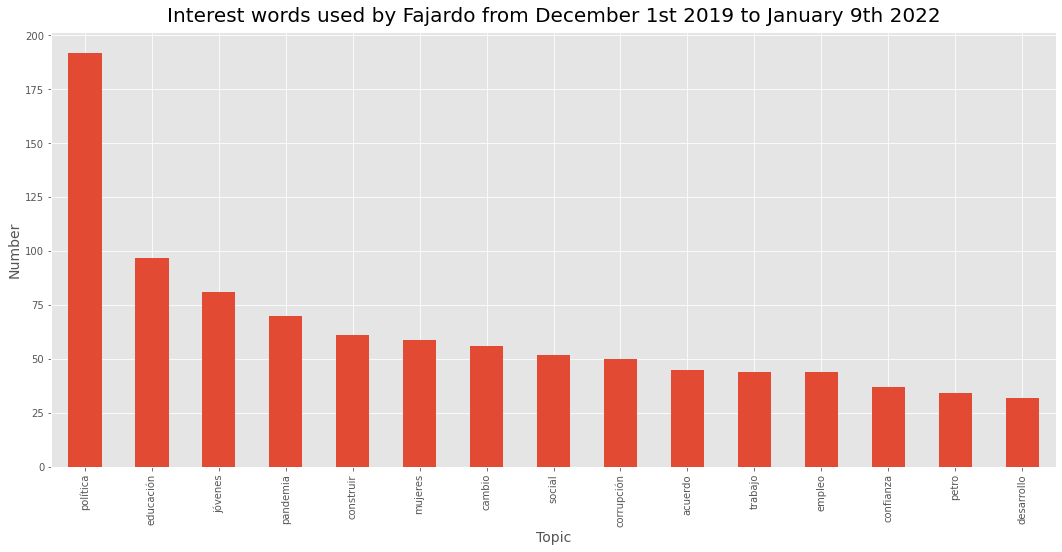

In [141]:
### Ploting the number of interest words - Fajardo

totals_by_topic_fajardo.plot(kind='bar')

plt.title("Interest words used by Fajardo from December 1st 2019 to January 9th 2022", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Number", fontdict={'fontsize': 14})
plt.xlabel("Topic", fontdict={'fontsize': 14})
plt.savefig('topics_total_fajardo.png')

In [113]:
## Defining words of interest in spanish - Fajardo
of_interest_fajardo = ['paz','seguridad','educación','pobreza','desarrollo','empleo',\
                             'trabajo','recursos','progreso','social','niños', 'prosperidad',\
                             'víctimas','policía','conflicto','posconflicto''verdad''justicia',\
                             'reparación','restitución', 'garantías', 'garantía', 'repetición',\
                             'género', 'tierra', 'tierras', 'rural','reforma','zonas','integral', 'indígenas', 'campensina',\
                             'campesinos','pensión', 'pensional', 'salud', 'infancia',\
                             'adolescencia','paz', 'jurisdicción','jep', 'jueces', 'justicia', 'farc','guerrila', 'acuerdo', 'cultivos', 'ilícitos',\
                             'narcotráfico', 'inclusión','reconciliación','transporte',\
                             'vías','grupos','étnicos','empresa', 'empresarios', 'empresariado',\
                             'privado', 'regiones','transformación', 'estructural','alimentos',\
                             'nutrición', 'niñas','adulto', 'adultos', 'mayor', 'mayores',\
                             'ingresos','sostenibilidad', 'ambiental', 'medio',\
                             'ambiente', 'reserva', 'cooperativas', 'miseria',\
                             'extrema', 'campo','vulnerabilidad', 'bienestar', 'paramilitares',\
                             'paramilitar','banrep','ingreso','solidario', 'marcha', 'marchas','protesta','protestas','sos','matando','líderes'\
                             'integralidad','innovación','ciencia', 'tecnología', 'asistencia','naranja',\
                             'técnica','infraestructura', 'conectividad', 'propiedad','participación',\
                             'eln', 'ied' 'vías', 'concertación', 'democracia', 'formalización',\
                             'agrícola', 'fondo','tierras', 'reserva', 'forestal', 'catastral',\
                             'subsidios', 'subsidio', 'créditos', 'crédito','capacitación',\
                             'comercialización', 'agraria', 'jurisdicción', 'economía',\
                             'impuestos','tributaria','comunidades', 'corrupción', 'inversión',\
                             'crisis','venezuela', 'mujer', 'mujeres', 'niñas','servicios',\
                             'energía','agua', 'conectividad', 'investigación', 'desarrollo',\
                             'eficiencia','ingresos','plan','programa','resultados', 'asociatividad',\
                             'lgtbi', 'comercio', 'agricultura', 'prosperidad','social', 'familia',\
                             'derechos', 'garantías','congreso', 'prevención', 'región', 'regiones',\
                             'evaluación','seguimiento','calidad', 'protesta', 'protestas','crecimiento',\
                             'guerra', 'ciudadana', 'ciudadanos', 'tolerancia', 'vivienda',\
                             'oportunidad', 'control', 'trabajo', 'obras', 'electoral', 'transparencia',\
                             'construir', 'municipios', 'municipios', 'cese', 'fuego', 'departamento',\
                             'departamentos', 'pueblo','compromiso','nuevo','nueva', 'información',\
                             'sometimiento', 'monitoreo', 'cambio', 'derecho','reincorporación', 'campaña',\
                             'representación', 'política', 'problema', 'realidad', 'acceso', 'pobres',\
                             'desempleo', 'extrema', 'responsabilidad', 'pedagogía', 'juntos',\
                             'inversiones', 'respeto', 'garantía','derechos', 'humanos', 'fiscal',\
                             'construcción', 'estado', 'acción', 'acciones', 'criminales', 'instituciones',\
                             'universidades', 'academia', 'confianza', 'plan', 'equidad','atención',\
                             'narcotráfico','militares','supervisión', 'inspección', 'minería',\
                             'regalías', 'sometimiento', 'drogas', 'ilícitas', 'colombia','jóvenes',\
                             'producción','económico','colegios','competitividad','energía','cifra',\
                             'cultura', 'tratados', 'progreso', 'campaña', 'constitución','público',\
                             'constitucional','empleos', 'empleo', 'constituyente', 'industria',\
                             'sena', 'lavado', 'activos', 'diálogos', 'humanos', 'convivencia',\
                             'legitimidad', 'leyes', 'reformas', 'ley', 'presupuesto', 'alianza',\
                             'dólar', 'petróleo', 'inflación', 'pib', 'deuda', 'ocde', 'oecd', 'políticas',\
                             'públicas', 'público', 'militar', 'militares', 'gremios', 'cafeteros',\
                             'café', 'agro', 'cafeteros', 'colectiva', 'discriminación', 'articulación',\
                             'institucional', 'interinstitucional', 'juntos', 'habana','dependencia','aguacate', 'reto',\
                             'privado', 'prioridad', 'turismo', 'cooperación', 'mesa', 'apoyo',\
                             'acompañamiento', 'internacional', 'redes', 'sociales', 'inversionistas',\
                             'desigualdad', 'bilateral', 'improductivas', 'terrorismo', 'bandas', 'bacrim','medios',\
                             'comunicación', 'estrategia', 'estrategias', 'judicial', 'homicidios',\
                             'inseguridad', 'presencia', 'cambio', 'climático', 'carreteras', 'apps',\
                             'responsables', 'población', 'civil', 'desplazamiento', 'desplazados',\
                             'desplazamientos','retornos', 'reubicaciones', 'delitos', 'lesa',\
                             'humanidad', 'petróleo', 'hechos', 'productividad', 'competitividad',\
                             'uribe', 'santos', 'petro','fajardo', 'claudia', 'lópez', 'martha','lucia','ramirez',\
                             'iván', 'duque', 'humberto', 'calle', 'partido', 'conservador', 'liberal', 'verde',\
                             'conflictos', 'resolución', 'amnistía', 'ricos', 'libertad','cuidadanía','libre','tlc', 'presidente', 'riqueza', 'ricos',\
                             'privación', 'defensa', 'gratis', 'gratuita', 'extorsión', 'secuestro',\
                             'desmovilización', 'desmovolizados', 'comandantes', 'fuerzas', 'armadas',\
                             'guerrilleros', 'brechas', 'brecha',\
                             'internet', 'acceso', 'enemigos', 'perdón', 'salarios', 'minas','deporte',\
                             'recreación', 'elecciones', 'campaña', 'déficit', 'delincuentes',\
                             'delincuencia', 'cárcel', 'acueducto', 'tratados', 'coca', 'marihuana',\
                             'igualdad', 'impunidad', 'muertos', 'muerte', 'maestros',\
                             'cabecillas', 'consumidor', 'consumidores', 'recursos', 'naturales',\
                             'renovables', 'castigo', 'covid', 'pandemia', 'marchas', 'protesta','vacunas', 'vacunación','renta','vital','mínimo']       

In [114]:
### Len of words of interest - Fajardo
len(of_interest_fajardo)

411

In [115]:
### Filtering from all tokens, the words of interest - Fajardo
tokens_of_interest_fajardo = [w for w in all_tokens_fajardo if w in of_interest_fajardo]

In [116]:
### Adding the frequency of the words in each list - Fajardo
freq_tokens_of_interes_fajardo = nltk.FreqDist(tokens_of_interest_fajardo).most_common()

In [117]:
### Having a look at it: how many times is the word of interest mentioned - Fajardo
freq_tokens_of_interes_fajardo

[('colombia', 261),
 ('política', 191),
 ('educación', 96),
 ('jóvenes', 81),
 ('presidente', 76),
 ('pandemia', 69),
 ('fajardo', 62),
 ('construir', 61),
 ('mujeres', 59),
 ('cambio', 56),
 ('social', 52),
 ('corrupción', 50),
 ('trabajo', 44),
 ('acuerdo', 44),
 ('empleo', 43),
 ('compromiso', 41),
 ('nuevo', 40),
 ('campaña', 39),
 ('duque', 38),
 ('redes', 38),
 ('paz', 37),
 ('medio', 37),
 ('confianza', 36),
 ('estado', 35),
 ('crisis', 35),
 ('mujer', 33),
 ('desarrollo', 32),
 ('petro', 32),
 ('apoyo', 32),
 ('atención', 31),
 ('sociales', 31),
 ('nueva', 29),
 ('congreso', 29),
 ('transformación', 29),
 ('plan', 29),
 ('justicia', 28),
 ('respeto', 27),
 ('problema', 25),
 ('calle', 25),
 ('reforma', 25),
 ('familia', 24),
 ('construcción', 24),
 ('seguridad', 24),
 ('programa', 22),
 ('transparencia', 22),
 ('ley', 21),
 ('muerte', 21),
 ('ciencia', 20),
 ('oportunidad', 19),
 ('uribe', 19),
 ('tributaria', 19),
 ('derechos', 18),
 ('instituciones', 18),
 ('mayor', 18),
 ('r

# Discussion and conclusion

Overall, Petro has more Twitter presence than Fajardo, with more publications, retweets and followers. The days the candidates publish more posts are Monday and Tuesday for Petro and Wednesday and Friday for Fajardo. In general terms, there is not statistical evidence that show that the day of the week influences the number of retweets that the candidates receive, especially for Fajardo. Nevertheless, when Petro posts on Thursday the number of retweets increases in 50.6 on average with a confidence level of 94%, which represents a size effect of 14.5% considering that the mean of the retweets that he has received from the analyzed period is 353.4. Likewise, with a confidence level of 95% when Petro posts a message on weekends, the number of retweets is reduced by 43.6 on average, which represents a size effect of 13.2%.

Once filtered the words that the candidates use more in their posts, it is possible to conclude that Petro’s campaign speech is based on criticizing the current Government (Duque) as well as the former president (Uribe) and the current mayor of Bogota (claudialopez), which aggregated represent 28% of the top 15 most common words. The most relevant concerns about Fajardo are education and human capital (education, youngsters, women, social) represent aggregated is equivalent to the 30% of his top 10 most used words. 

In conclusion, topics related to i) current government (Duque, Uribe, ClaudiaLopez), ii) social affairs and justice (health, social, change, life, citizens, peace, deal, rights, justice, law, policy) and iii) strikes and violence (police, deaths, defense,  strikes) seems to matter for Petro, indeed 3 out of 10 strategic words, defined in the dictionary, that he posts are related to those topics. Nevertheless, important issues about agriculture, infrastructure and education are mentioned less than 5 out of 100 times.  On the other hand, Fajardo centers his campaign in i) education, human capital, ii) change and corruption (change, transformation, new, policy, reform, built) iii) employment (employment, job) as well with 3 out of 10 strategic words that he uses. However, topics such as oil, infrastructure, investment, international trade, strikes are mentioned less than 4 out of 100 times. 

Finally, for future analysis it would be accurate to implement a machine learning tool that would allow us to classify the words of interest that were defined in the dictionary into categories (education, social affairs, etc.) to reduce the time of was spent in classyfying the words manually. On the other hand, an improvement of the current assignment could involve a way to filter from the text analysis only the Tweets that were created by the candidates, since our approach includes Retweets that the candidates posted. By doing so, the candidate's speach analysis could be improved. 